In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [2]:
!pip install seaborn

In [3]:
import seaborn as sns

In [4]:
ab = pd.read_csv('Absenteeism_at_work.tsv', sep='\t')

In [5]:
ab

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [6]:
data = ab

In [7]:
data.rename(columns={'Reason for absence': 'Reason_for_absence'}, inplace=True)

In [8]:
data = ab.query('Reason_for_absence == 23')

In [9]:
data = data.groupby('Day of the week')['Reason_for_absence'].count()

In [10]:
data = data.reset_index()

In [11]:
data

,Day of the week,Reason_for_absence
0,2,22
1,3,37
2,4,33
3,5,30
4,6,27


Text(0, 0.5, 'Reason for absence number 23')

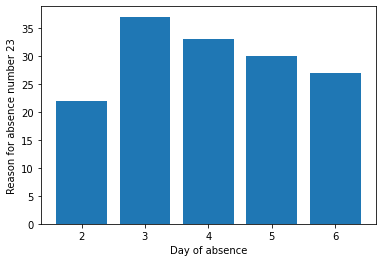

In [12]:
plt.bar(data['Day of the week'], data['Reason_for_absence'])

plt.xlabel('Day of absence')
plt.ylabel('Reason for absence number 23')

In [13]:
np.corrcoef(ab['Day of the week'],
           ab['Reason_for_absence'])

array([[1.        , 0.11631924],
       [0.11631924, 1.        ]])

In [14]:
pearsonr(ab['Day of the week'], ab['Reason_for_absence'])

(0.1163192439304276, 0.0015262702957113687)

It has a positive corrilation but it is a very small number which means the corrilation is not very strong.

I would say corrilation is not significant.

The realationship between the two shows no linear corrilation but it does seem the later in the week it gets the reason for absence changes. 

In [15]:
pearsonr(ab['Month of absence'], ab['Age'])

(-0.0015195444984268044, 0.9670836591482739)

In [16]:
spearmanr(ab['Month of absence'], ab['Age'])

SpearmanrResult(correlation=0.0016805552597149393, pvalue=0.9635981476773132)

In [17]:
ac = ab.groupby('Month of absence')['Age'].value_counts()

In [39]:
ac

Month of absence  Age
0                 39      1
                  40      1
                  53      1
1                 37     14
                  28      7
                         ..
12                29      1
                  31      1
                  33      1
                  34      1
                  47      1
Name: Age, Length: 184, dtype: int64

In [19]:
ab.groupby('Age').value_counts()

Age  ID  Reason_for_absence  Month of absence  Day of the week  Seasons  Transportation expense  Distance from Residence to Work  Service time  Work load Average/day   Hit target  Disciplinary failure  Education  Son  Social drinker  Social smoker  Pet  Weight  Height  Body mass index  Absenteeism time in hours
27   27  23                  1                 5                2        184                     42                               7             308.593                 95          0                     1          0    0               0              0    58      167     21               2                            2
         6                   8                 4                1        184                     42                               7             265.615                 94          0                     1          0    0               0              0    58      167     21               8                            1
         23                  2                 3   

In [20]:
ab.groupby('Month of absence')['Age'].value_counts()

Month of absence  Age
0                 39      1
                  40      1
                  53      1
1                 37     14
                  28      7
                         ..
12                29      1
                  31      1
                  33      1
                  34      1
                  47      1
Name: Age, Length: 184, dtype: int64

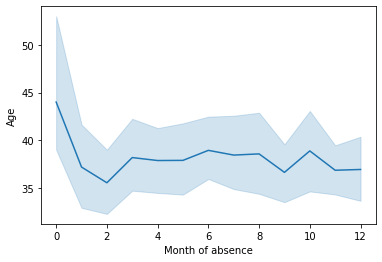

In [38]:
ax = sns.lineplot(data= ac, x='Month of absence', y='Age')

<AxesSubplot:xlabel='Month of absence'>

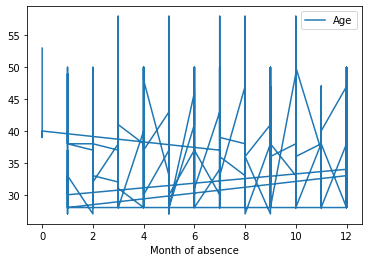

In [22]:
ab.plot.line(x='Month of absence', y='Age')

This corrilation is weak
this corrilation is not Stastically significant do to its high p value
I would explain that there is no significants between the month some took off and there age. 

In [23]:
spearmanr(ab['Hit target'], ab['Disciplinary failure'])

SpearmanrResult(correlation=-0.11472538854357511, pvalue=0.001772504612734226)

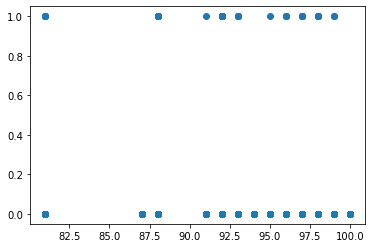

In [24]:
plt.scatter(ab['Hit target'], ab['Disciplinary failure'])

plt.show()

This relationship is a negative weak correlation
The correlation is not strong
The realation ship between the two is nothing there is no correlation between performance and being disciplined. I would explain that failure to disipline someone does not affect Hit target in anyway. 

In [25]:
pearsonr(ab['Service time'], ab['Reason_for_absence'])

(0.0484251154243409, 0.18822416547756862)

The correlation is not Strong
The correlation is not statistically significant
I would explain that it doesn't matter how long a employee has worked there reasons for absence stay the same.

In [26]:
pearsonr(ab['Transportation expense'], ab['Distance from Residence to Work'])

(0.26218311063190763, 4.2533009832573875e-13)

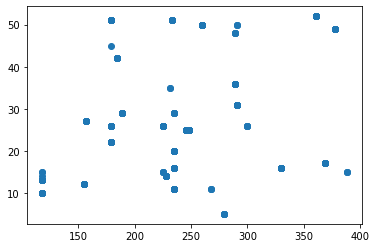

In [27]:
plt.scatter(ab['Transportation expense'], ab['Distance from Residence to Work'])
plt.show()

The correlation is a slight positive one
The correlation is significant 
The relationship is that the more expensive you transportation cost the further away from work you are. 

In [28]:
spearmanr(ab['Age'], ab['Pet'])

SpearmanrResult(correlation=-0.27576995864941006, pvalue=2.2121000884657082e-14)

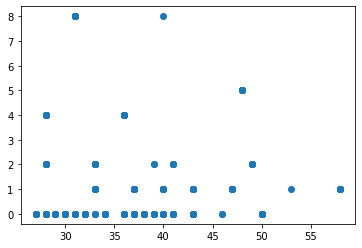

In [29]:
plt.scatter(ab['Age'], ab['Pet'])

There is a negative correlation 
The correlation is significant 
The realtion ship seems to be the younger you are the more likley you are to own multiple pets 

In [30]:
pearsonr(ab['Absenteeism time in hours'], ab['Day of the week'])

(-0.12436061376972074, 0.0006978426162533758)

There is a small negative relationship
The correrilation is significant 
The relationship between the two is people take more hours off later in the week. 

In [31]:
spearmanr(ab['Month of absence'],ab['Absenteeism time in hours'])

SpearmanrResult(correlation=0.00976773580605338, pvalue=0.7908027956418036)

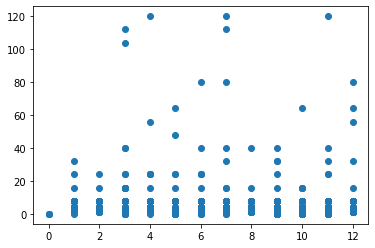

In [32]:
plt.scatter(ab['Month of absence'], ab['Absenteeism time in hours'])

The Correlation is weak 
The Correlation is statistaly insignificant 
The relationship is employees take the same amount of time off through out the year.

In [33]:
pearsonr(ab['Body mass index'], ab['Height'])

(-0.12104877689386093, 0.0009687237227505967)

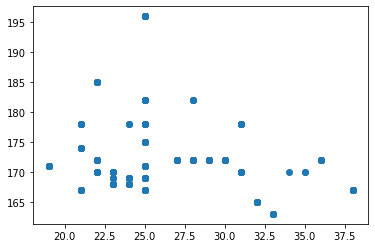

In [34]:
plt.scatter(ab['Body mass index'], ab['Height'])

The Correlation is a small negative 
The correlation is statistically significant 
The relationship shows that the Larger your BMI the shorter you are

In [35]:
spearmanr(ab['Pet'], ab['Disciplinary failure'])

SpearmanrResult(correlation=-0.0038737178518088527, pvalue=0.9162180838872527)

The Correlation is weak
The Correlation statistic is insignificant 
There is no relationship, The number of pets owned does not affect disiplinary failure. 